# Visualizing Hyperbolic Geometry

This notebook accompanies the presentation on Hyperbolic Geometry and Functional Analysis.
 We'll visualize the key concepts to build a strong intuition for *why* this geometry is so powerful for hierarchical data.

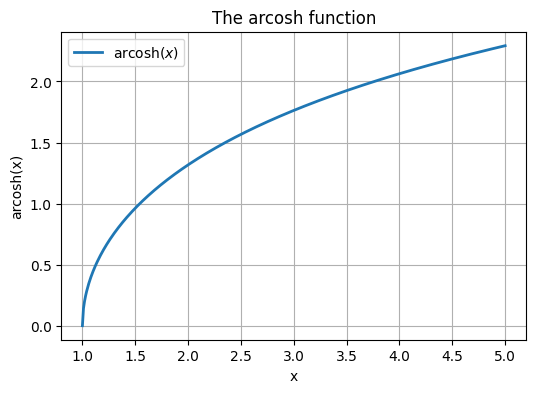

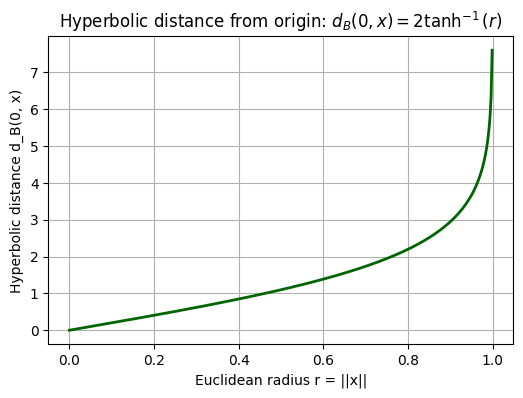

In [2]:
# Slidw 4,5
import numpy as np
import matplotlib.pyplot as plt

# Plot arcosh(x)
x = np.linspace(1, 5, 400)
y = np.arccosh(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r"$\operatorname{arcosh}(x)$", linewidth=2)
plt.title("The arcosh function")
plt.xlabel("x")
plt.ylabel("arcosh(x)")
plt.grid(True)
plt.legend()
plt.show()

# Plot hyperbolic distance from origin d_B(0, x)
r = np.linspace(0, 0.999, 400)  # radius within the unit disk
d_B = 2 * np.arctanh(r)         # distance in Poincaré metric

plt.figure(figsize=(6, 4))
plt.plot(r, d_B, color='darkgreen', linewidth=2)
plt.title("Hyperbolic distance from origin: $d_B(0, x) = 2\\tanh^{-1}(r)$")
plt.xlabel("Euclidean radius r = ||x||")
plt.ylabel("Hyperbolic distance d_B(0, x)")
plt.grid(True)
plt.show()


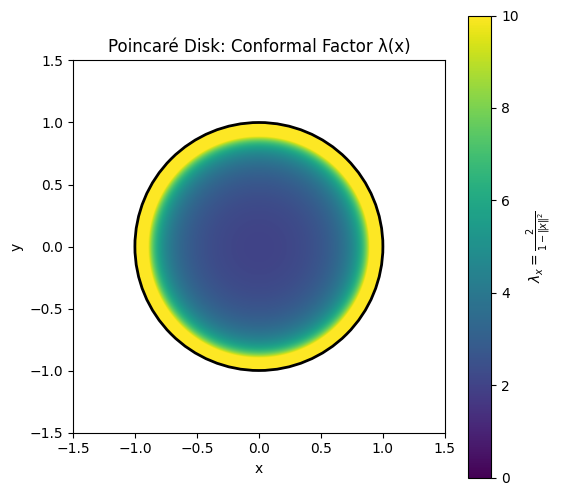

In [3]:
from matplotlib.pyplot import Circle
# Slide 6: conformal factor λ(x) in the Poincaré disk
# Create a grid of points in the unit disk (go closer to boundary for accuracy)
res = 400
x = np.linspace(-0.999, 0.999, res)
y = np.linspace(-0.999, 0.999, res)
X, Y = np.meshgrid(x, y)
R2 = X**2 + Y**2

# Define lambda_x = 2 / (1 - ||x||^2)
Lambda = np.full_like(R2, np.nan)  # Initialize with NaN outside disk
mask = R2 < 1
Lambda[mask] = 2 / (1 - R2[mask])

# Plot the conformal factor
plt.figure(figsize=(6, 6))
plt.imshow(Lambda, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis', vmin=0, vmax=10)  # Clipping vmax for visibility
plt.colorbar(label=r'$\lambda_x = \frac{2}{1 - \|x\|^2}$')

# Add disk boundary
circle = Circle((0, 0), 1.0, color='black', fill=False, linewidth=2)
plt.gca().add_artist(circle)

plt.title("Poincaré Disk: Conformal Factor λ(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5	)
plt.show()

The Poincaré Disk & Specificity Rings

First, let's just look at our 'playground,' the Poincaré Disk. We'll draw concentric rings to represent our **Specificity Prior**, $S(x) = \|x\|_2 = r$.

- **$r \approx 0$**: Maximal Generality (e.g., "Entity")
- **$r \approx 1$**: Maximal Specificity (e.g., "Golden Retriever")

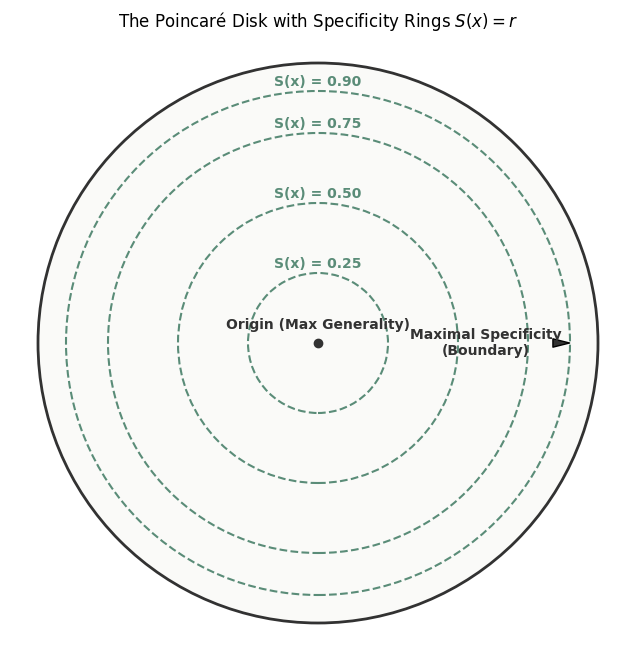

In [4]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Draw the main disk boundary
disk = patches.Circle((0, 0), 1.0, facecolor='#FAFAF8', edgecolor='#323232', linewidth=2, zorder=1)
ax.add_patch(disk)

# Draw specificity rings
radii = [0.25, 0.5, 0.75, 0.9]
colors = ['#5A8C78', '#5A8C78', '#5A8C78', '#5A8C78']
labels = ['S(x) = 0.25', 'S(x) = 0.50', 'S(x) = 0.75', 'S(x) = 0.90']

for r, c, label in zip(radii, colors, labels):
    ring = patches.Circle((0, 0), r, facecolor='none', edgecolor=c, linewidth=1.5, linestyle='--', zorder=2)
    ax.add_patch(ring)
    ax.text(0, r + 0.02, label, color=c, ha='center', weight='bold')

# Add center point
ax.plot(0, 0, 'o', color='#323232', zorder=3)
ax.text(0, 0.05, 'Origin (Max Generality)', color='#323232', ha='center', weight='bold')

# Add annotations
ax.annotate('Maximal Specificity\n(Boundary)', xy=(0.9, 0), xytext=(0.6, 0),
            arrowprops=dict(facecolor='#323232', shrink=0.05, width=1, headwidth=6),
            ha='center', va='center', color='#323232', weight='bold')

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title('The Poincaré Disk with Specificity Rings $S(x) = r$')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.axis('off')
plt.show()

## The Gradient Damping

This is the most important correction. The **Riemannian gradient** $\nabla_{\mathbb{B}} L$ is scaled version of the Euclidean gradient $\nabla L$. 

$$\nabla_{\mathbb{B}} L = g_x^{-1} \nabla L = \left(\frac{1-r^2}{2}\right)^{\mathbf{2}} \nabla L$$


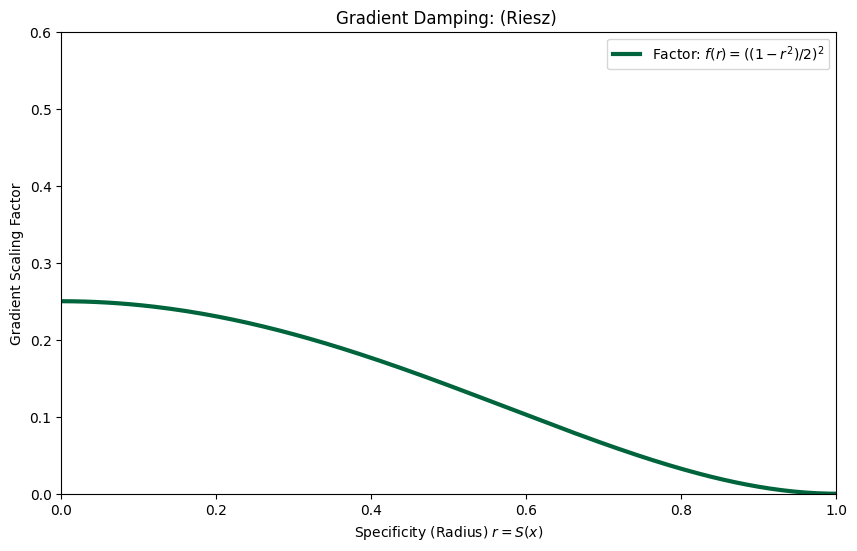

In [5]:
r = np.linspace(0, 1, 200)
# Correct formula (from Riesz Isomorphism)
f_r = ((1 - r**2) / 2)**2

plt.figure(figsize=(10, 6))
plt.plot(r, f_r, label='Factor: $f(r) = ((1-r^2)/2)^2$', color='#00643C', linewidth=3)

plt.xlabel('Specificity (Radius) $r = S(x)$')
plt.ylabel('Gradient Scaling Factor')
plt.title('Gradient Damping: (Riesz) ')
plt.legend()


plt.ylim(0, 0.6)
plt.xlim(0, 1)
plt.show()

## Exponential vs. Polynomial Volume

Finally, let's see *why* hyperbolic space has such a high capacity for trees. We'll compare the volume of a ball of radius $r$ in $n=2$ dimensions.



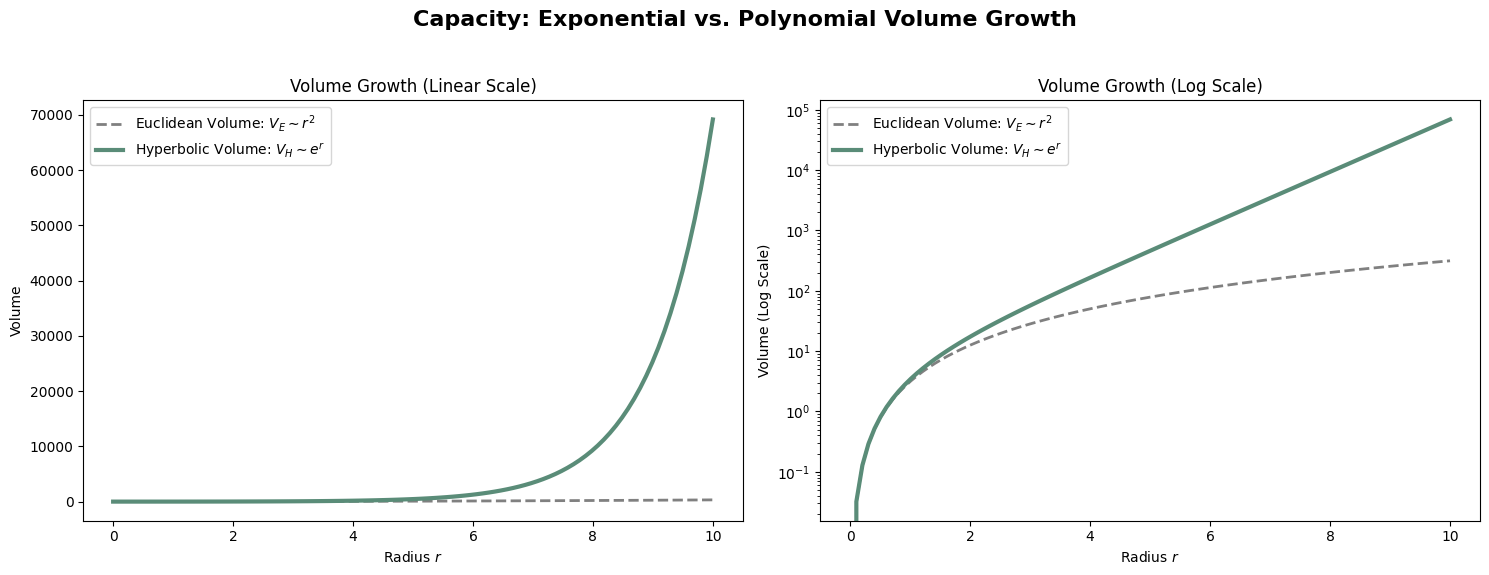

In [8]:
r = np.linspace(0, 10, 100) # Use a larger radius to see the effect

# Euclidean Volume (n=2)
V_E = np.pi * r**2

# Hyperbolic Volume (n=2, K=-1)
V_H = 2 * np.pi * (np.cosh(r) - 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Normal scale
ax1.plot(r, V_E, label='Euclidean Volume: $V_E \\sim r^2$', color='gray', linestyle='--', linewidth=2)
ax1.plot(r, V_H, label='Hyperbolic Volume: $V_H \\sim e^r$', color='#5A8C78', linewidth=3)
ax1.set_xlabel('Radius $r$')
ax1.set_ylabel('Volume')
ax1.set_title('Volume Growth (Linear Scale)')
ax1.legend()

# Plot 2: Log scale
ax2.plot(r, V_E, label='Euclidean Volume: $V_E \\sim r^2$', color='gray', linestyle='--', linewidth=2)
ax2.plot(r, V_H, label='Hyperbolic Volume: $V_H \\sim e^r$', color='#5A8C78', linewidth=3)
ax2.set_yscale('log')
ax2.set_xlabel('Radius $r$')
ax2.set_ylabel('Volume (Log Scale)')
ax2.set_title('Volume Growth (Log Scale)')
ax2.legend()

plt.suptitle('Capacity: Exponential vs. Polynomial Volume Growth', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # type: ignore
plt.show()

As you can see, the hyperbolic volume is *unbelievably* larger. This room is what allows it to embed massive trees with very low distortion. The log-scale plot shows the straight line for hyperbolic space, proving its exponential nature.